In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR100
import torchvision.transforms as transforms
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split,ConcatDataset
from torchsummary import summary

import ResNet
import ResNet1
import data
import CNN
import evaluate
import train

Files already downloaded and verified


In [2]:
%%time
nets, train_loss_his, test_loss_his = train.train_smallNet(10000,1000,10)

iter:   1000, train loss: 2.99870174074173, test_loss: 98.09961462020874
accuracy: 37.24%
iter:   2000, train loss: 2.0099417344331743, test_loss: 81.06492173671722
accuracy: 46.37%
iter:   3000, train loss: 1.579287707567215, test_loss: 72.08924841880798
accuracy: 51.03%
iter:   4000, train loss: 1.2932057038545608, test_loss: 68.5653406381607
accuracy: 53.71%
iter:   5000, train loss: 1.068095874428749, test_loss: 64.98383963108063
accuracy: 55.93%
iter:   6000, train loss: 0.8850931547284127, test_loss: 64.79577219486237
accuracy: 56.58%
iter:   7000, train loss: 0.731370781302452, test_loss: 65.3317699432373
accuracy: 56.57%
iter:   8000, train loss: 0.5972086673080921, test_loss: 64.52763390541077
accuracy: 57.620000000000005%
iter:   9000, train loss: 0.48842821222543714, test_loss: 65.54782950878143
accuracy: 58.099999999999994%
iter:  10000, train loss: 0.3930544444769621, test_loss: 67.88087272644043
accuracy: 58.099999999999994%
iter:   1000, train loss: 3.0132847495079043, t

iter:   7000, train loss: 0.7299829366207122, test_loss: 61.562593936920166
accuracy: 58.79%
iter:   8000, train loss: 0.5964617800414562, test_loss: 62.75068926811218
accuracy: 58.989999999999995%
iter:   9000, train loss: 0.48629327419400215, test_loss: 64.08162009716034
accuracy: 58.78%
iter:  10000, train loss: 0.3930261641144753, test_loss: 66.4033784866333
accuracy: 58.64%
iter:   1000, train loss: 2.9919130370616913, test_loss: 98.02438569068909
accuracy: 37.19%
iter:   2000, train loss: 1.9999704239368439, test_loss: 81.13920617103577
accuracy: 46.87%
iter:   3000, train loss: 1.563618002653122, test_loss: 70.42205226421356
accuracy: 52.49%
iter:   4000, train loss: 1.273773417532444, test_loss: 65.81583070755005
accuracy: 55.379999999999995%
iter:   5000, train loss: 1.0540003254413606, test_loss: 63.660836577415466
accuracy: 56.36%
iter:   6000, train loss: 0.8729466614127159, test_loss: 63.19836127758026
accuracy: 57.489999999999995%
iter:   7000, train loss: 0.7207111241817

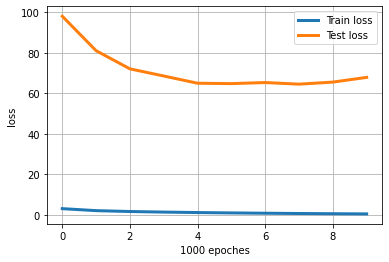

In [19]:
plt.plot(range(len(train_loss_his[0])),train_loss_his[0],'-',linewidth=3,label='Train loss')
plt.plot(range(len(train_loss_his[0])),test_loss_his[0],'-',linewidth=3,label='Test loss')
plt.xlabel('1000 epoches')
plt.ylabel('loss')
plt.grid(True)
plt.legend()

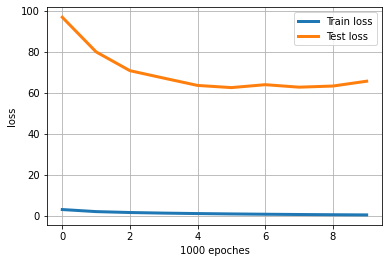

In [20]:
plt.plot(range(len(train_loss_his[1])),train_loss_his[1],'-',linewidth=3,label='Train loss')
plt.plot(range(len(train_loss_his[1])),test_loss_his[1],'-',linewidth=3,label='Test loss')
plt.xlabel('1000 epoches')
plt.ylabel('loss')
plt.grid(True)
plt.legend()

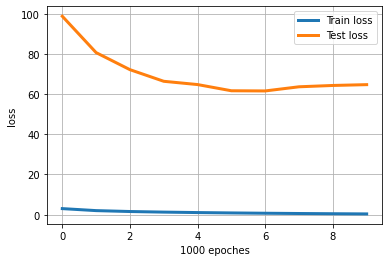

In [21]:
plt.plot(range(len(train_loss_his[2])),train_loss_his[2],'-',linewidth=3,label='Train loss')
plt.plot(range(len(train_loss_his[2])),test_loss_his[2],'-',linewidth=3,label='Test loss')
plt.xlabel('1000 epoches')
plt.ylabel('loss')
plt.grid(True)
plt.legend()

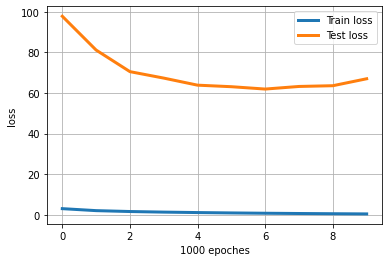

In [22]:
plt.plot(range(len(train_loss_his[3])),train_loss_his[3],'-',linewidth=3,label='Train loss')
plt.plot(range(len(train_loss_his[3])),test_loss_his[3],'-',linewidth=3,label='Test loss')
plt.xlabel('1000 epoches')
plt.ylabel('loss')
plt.grid(True)
plt.legend()

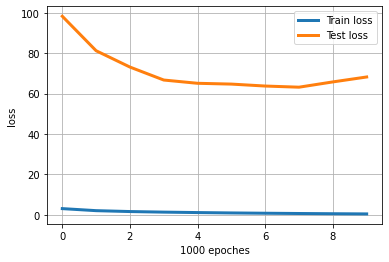

In [23]:
plt.plot(range(len(train_loss_his[4])),train_loss_his[4],'-',linewidth=3,label='Train loss')
plt.plot(range(len(train_loss_his[4])),test_loss_his[4],'-',linewidth=3,label='Test loss')
plt.xlabel('1000 epoches')
plt.ylabel('loss')
plt.grid(True)
plt.legend()

In [8]:
trainDataLoader, testDataLoader =  data.loadData(250)

In [9]:
def evaluate_2(models,dataloader):
  acc = 0.0
  rights = 0
  wrongs = 0
  for i, test_examples in enumerate(dataloader, 0):
    #predicting using the nets
    inputs, labels = test_examples
    for j,m in enumerate(models):
        if j == 0:
            predicted_outputs = nets[j](inputs.float().cuda())
        else:
            predicted_outputs += nets[j](inputs.float().cuda())
    
    #Selecting the label which has the largest outputs
    outputs = torch.argmax(predicted_outputs, 1)

    #Counting successfully and unsuccessfully predicted cases
    for j, n in enumerate(outputs):
      if n == labels[j]:
        rights += 1
      else:
        wrongs += 1
  #calculate accuracy with the cases we recorded
  acc = rights/(rights+wrongs)
  #return the accuracy
  return acc

In [10]:
print('accuracy: ' + str(evaluate_2(nets,testDataLoader)*100) + '%')

accuracy: 67.16%


In [11]:
print('accuracy: ' + str(evaluate_2(nets[0:2],testDataLoader)*100) + '%')

accuracy: 62.72%


In [12]:
print('accuracy: ' + str(evaluate_2(nets[0:3],testDataLoader)*100) + '%')

accuracy: 64.31%


In [13]:
print('accuracy: ' + str(evaluate_2(nets[0:4],testDataLoader)*100) + '%')

accuracy: 65.35%


In [27]:
print('accuracy: ' + str(round(evaluate_2([nets[0]],testDataLoader)*100,2)) + '%')

accuracy: 58.1%


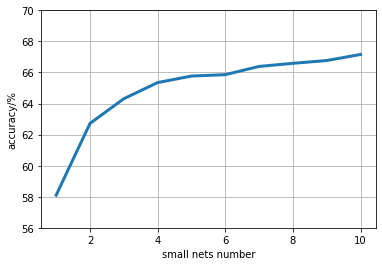

In [33]:
res = [evaluate_2([nets[0]],testDataLoader)*100]
for i in range(1,10):
    res.append(round(evaluate_2(nets[0:i+1],testDataLoader)*100,2))
plt.ylim(ymin = 56, ymax=70)
plt.plot([1,2,3,4,5,6,7,8,9,10],res,'-',linewidth=3)
plt.xlabel('small nets number')
plt.ylabel('accuracy/%')
plt.grid(True)